In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
import time

plt.close("all")

#import libraries


In [1]:
#run this to before generate url
def isleapyear(year):
    return year % 400 == 0 or year % 100 != 0 and year % 4 == 0
    
def calculatedays(day, month, year): 
    days = 0
    
    if month == 0:
        days = day
    elif month == 1:
        days = day + 31
    elif month == 2:
        if isleapyear(year) == True:
            days = day + 31 + 29
        else:
            days = day + 31 + 28
    elif month == 3:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31
        else:
            days = day + 31 + 28 + 31
    elif month == 4:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30
    elif month == 5:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31
    elif month == 6:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30
    elif month == 7:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31
    elif month == 8:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31
    elif month == 9:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30
    elif month == 10:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31
    elif month == 11:
        if isleapyear(year) == True:
            days = day + 31 + 29 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31 + 30
        else:
            days = day + 31 + 28 + 31 + 30 + 31 + 30 + 31 + 31 + 30 + 31 + 30
    
    return days

In [28]:
#generate url

#input variables for url
day = 26
month = 5  # 0-11  0=jan  11=dec
year = 2023
lamid = 20011

days = calculatedays(day, month, year)

urlyear = year - 2000

url = "https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_" + str(lamid) + "_" + str(urlyear) + "_" + str(days) + ".csv"

print(url)

https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_20011_23_177.csv


In [29]:
#get csv data from url and convert it to pandas dataframe

response_API = requests.get(url)
data = response_API.text
csvString = StringIO(data)
df_test = pd.read_csv(csvString, header=None, delimiter=';')
#print(response_API.status_code)

In [33]:
#sort csv data
result1 = pd.DataFrame()
car_type = 5
data1 = []
data2 = []

for i in range(24):
    dataholder1 = df_test.loc[(df_test[10] == car_type) & (df_test[3] == i) & (df_test[9] == 1) & (df_test[12] == 0)]
    dataholder2 = df_test.loc[(df_test[10] == car_type) & (df_test[3] == i) & (df_test[9] == 2) & (df_test[12] == 0)]
    dataholder = [dataholder1, dataholder2]
    result = pd.concat(dataholder)
    test1 = result.iloc[:, 3].mean()
    test2 = result.iloc[:, 11].mean()
    data1.append(test1)
    data2.append(test2)
    #result1 = pd.concat([result1, result])

#result1 = result1.iloc[:, [3,11]]
#result1.reset_index(drop=True, inplace=True)

In [34]:
list = {'hours':data1, 'speeds':data2}
df = pd.DataFrame(list)

In [35]:
df

,hours,speeds
0,0.0,95.272727
1,1.0,89.428571
2,2.0,62.071429
3,3.0,83.571429
4,4.0,90.750000
5,5.0,78.428571
6,6.0,82.500000
7,7.0,81.634146
8,8.0,77.371429
9,9.0,78.456522


<Axes: xlabel='hours'>

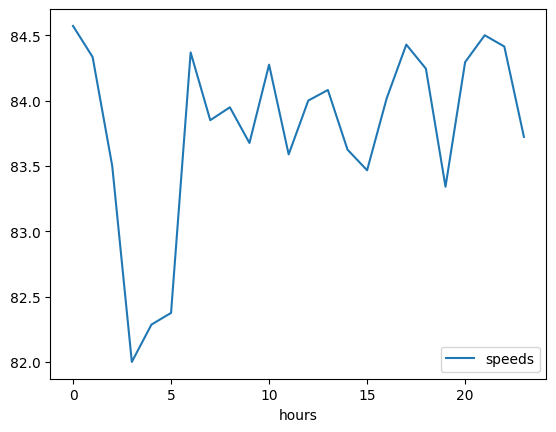

In [27]:
#show sorted data
df.plot(x='hours', y='speeds')

In [14]:


#data = response_API.text
#csvString = StringIO(data)
#df_test = pd.read_csv(csvString, header=None, delimiter=';')


In [5]:
#input variables for url
day = 30
month = 5  # 0-11  0=jan  11=dec
year = 2022
lamid = 172

days = calculatedays(day, month, year)

urlyear = year - 2000

test = days

In [7]:
    days = test
    url = "https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_" + str(lamid) + "_" + str(urlyear) + "_" + str(days) + ".csv"
    response_API = requests.get(url)
    print(response_API)

<Response [200]>


In [6]:
for i in range(14):
    days = test + i
    url = "https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_" + str(lamid) + "_" + str(urlyear) + "_" + str(days) + ".csv"
    response_API = requests.get(url)
    #print(response_API.status_code)
    if response_API.status_code == 200:
        print("data found")
    else:
        print(response_API.status_code)
    time.sleep(3)
    

data found
data found
data found
data found
data found
data found
data found
data found
data found
data found
data found
data found
data found
data found


In [3]:
def generateurl(days, year):
    urlyear = year - 2000
    url = "https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_" + str(lamid) + "_" + str(urlyear) + "_" + str(days) + ".csv"
    return url

In [8]:
#input variables for url
#README.md voi tarkistaa käytettävät lamid:t
lamid = 10
#start day
day = 1
month = 0  # 0-11  0=jan  11=dec
year = 2020
#end day
day2 = 31
month2 = 6  # 0-11  0=jan  11=dec
year2 = 2023
#car type 9 = HCT
car_type = 9

startday = calculatedays(day, month, year)
endday = calculatedays(day2, month2, year2)
if year > year2:
    temp1 = year
    temp2 = year2
    year1 = temp2
    year2 = temp1
if year == year2 and startday > endday:
    temp1 = startday
    temp2 = endday
    startday = temp2
    endday = temp1
loops = endday - startday +1
if loops < 1 and isleapyear(year) == True:
    loops = 366-startday+endday+1
if loops < 1:
    loops = 365-startday+endday+1
if year < year2 and startday == endday:
    years = year2 - year
    loops = years * 365
if year < year2 and startday < endday:
    years = year2 - year
    loops = loops + years * 365 -1
print(loops)

for i in range(loops):
    days = startday + i
    
    if days > 365 and isleapyear(year) == False:
        if(year2 - year) == 1:
            days = days - 365 
            url = generateurl(days, year2)
        if (year2 - year) > 1:
            days = days - 365
            url = generateurl(days, year+1)
            if days > 366 and isleapyear(year+1) == True:
                days = days - 366
                url = generateurl(days, year+2)
                if days > 365:
                    days = days - 365
                    url = generateurl(days, year+3)
            elif days > 365 and isleapyear(year+1) == False:
                days = days - 365
                url = generateurl(days, year+2)
                if days > 365:
                    days = days - 365
                    url = generateurl(days, year+3)
    elif days > 366 and isleapyear(year) == True:
        if (year2 - year) == 1:
            days = days - 366
            url = generateurl(days, year2)
        if (year2 - year) > 1:
            days = days - 365
            url = generateurl(days, year+1)
            if days > 365:
                days = days - 365
                url = generateurl(days, year+2)
                if days > 365:
                    days = days - 365
                    url = generateurl(days, year+3)
    else: 
        url = generateurl(days, year)

    print(url)


1306
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_1.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_2.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_3.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_4.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_5.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_6.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_7.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_8.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_9.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_10.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_11.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_12.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_13.csv
https://tie.digitraffic.fi/api/tms/v1/history/raw/lamraw_10_20_14.csv
https://tie.digitraffic.

In [ ]:
list_data = []
for i in range(24):
    timedata = dataholder.loc[(dataholder[10] == car_type) & (dataholder[3] == i)]
    data_array = [timedata]
    loopeddata = pd.concat(data_array)
    data_list = loopeddata.iloc[:, 11].tolist()
    list_data.append(data_list)
    #print(data_test)
#print(test1)
#df_test = pd.DataFrame(test1, columns=['a','b','c','d'])
#list_test = {'0':test1[0], '1':test1[1], '2':test1[2], '3':test1[3], '4':test1[4], '5':test1[5],
#             '6':test1[6], '7':test1[7], '8':test1[8], '9':test1[9], '10':test1[10], '11':test1[11],
#             '12':test1[12], '13':test1[13], '14':test1[14], '15':test1[15], '16':test1[16], '17':test1[17],
#             '18':test1[18], '19':test1[19], '20':test1[20], '21':test1[21], '22':test1[22], '23':test1[23],}
#df_test = pd.DataFrame(list_test)
#df_test['0'] = df_test['0'].astype(int)
#df_test['1']
#df_test.boxplot()
#df_test.dtypes
#print(list_test)
#test1.boxplot()